### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Apr 10th at 11.59pm CST
---

## Only one problem this week

This is a regression problem. Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [57]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astroML.linear_model import LinearRegression
from astroML.linear_model import NadarayaWatson
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor

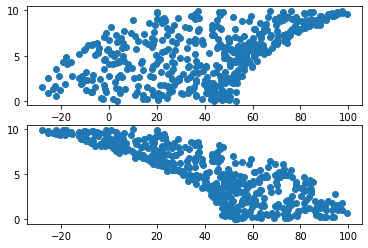

In [4]:
#1
data= np.load('../../homeworks/hw_data/hw7_data_1.npy')
fig,axs= plt.subplots(2)
axs[0].scatter(data[:,2],data[:,0])
axs[1].scatter(data[:,2],data[:,1])
plt.show()

[57.10102323  4.94873016 -8.30023407]


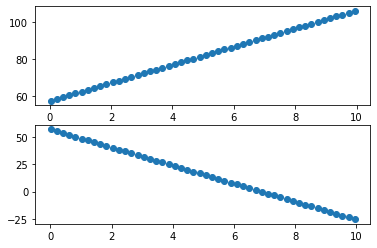

In [19]:
#2
model = LinearRegression()
model.fit(data[:,0:2],data[:,2], data[:,3])
print(model.coef_)

xgrid1= np.linspace(np.amin(data[:,0]),np.amax(data[:,0]),50)
xgrid2= np.linspace(np.amin(data[:,1]),np.amax(data[:,1]),50)
y1= model.coef_[0]+xgrid1*model.coef_[1]
y2= model.coef_[0]+xgrid2*model.coef_[2]

fig,axs= plt.subplots(2)
axs[0].scatter(xgrid1,y1)
axs[1].scatter(xgrid2,y2)
plt.show()
#The scatter is not represented at all by these lines, so no this isn't a great representation of the data, but it 
#captures the trend

In [21]:
#3
Xgrid3d = np.vstack(map(np.ravel, np.meshgrid(xgrid1, xgrid2))).T
prediction= model.predict(Xgrid3d)

<ipython-input-21-c4f1634a37e6>:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Xgrid3d = np.vstack(map(np.ravel, np.meshgrid(xgrid1, xgrid2))).T


In [26]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(data[:,0],data[:,1], data[:,2], color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid3d[:,0].flatten(), Xgrid3d[:,1].flatten(),prediction, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

<IPython.core.display.Javascript object>

In [27]:
# To turn off interactive plotting
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of $0.2$. Visualize interactively as before. How does this look compared to previous models?


6. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


7. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out a $20\%$ cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [49]:
#4
#using the gridsearch routine but for ridge regression instead of KDE
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
grid = GridSearchCV(Ridge(), ridge_params,cv=10) 
grid.fit(data[:,0:2],data[:,2], data[:,3])
alpha_opt = grid.best_params_['alpha']
solver_opt = grid.best_params_['solver']
print('Best params = ')
print(alpha_opt,solver_opt)
print('Best score = '+str(grid.best_score_))

ridgecv= RidgeCV(cv=10).fit(data[:,0:2],data[:,2], data[:,3])
print('Best alpha as per RidgeCV ='+str(ridgecv.alpha_))

modelRidge = Ridge(alpha=1,solver='lsqr') # the best fit
modelRidge.fit(data[:,0:2],data[:,2], data[:,3])
y_predRidge = modelRidge.predict(Xgrid3d)
#RidgeCV and GridSearchCV do not agree for alpha!

/Users/keshawnivory/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass groups=[1.87575433 2.91421645 1.85647292 1.49796527 1.02998777 2.62829324
 0.81637639 2.88299116 1.57663389 2.82984808 1.71158882 1.5072086
 1.35948841 2.57755635 0.5856459  0.82913665 2.85368358 1.216412
 2.07392723 0.73921865 0.86793727 0.60868353 2.93585485 1.44871127
 2.10857478 2.21484067 1.68199439 1.11710414 1.03828972 2.62555882
 0.7501069  2.90668329 2.90720885 2.19712669 0.7278188  1.4236574
 2.1381763  1.31414    1.32715761 1.5688771  2.30463948 0.73504279
 1.87909948 0.77585072 2.541907   1.20131057 1.46127528 1.03840512
 2.79099773 0.74291308 0.97718143 1.71545487 1.1267784  2.1107179
 1.78557599 2.34192794 1.2925626  1.94987943 2.0470041  1.90174572
 2.68177945 2.4933913  1.58799576 2.58834662 1.72224873 2.53397739
 2.06719525 0.54776878 1.9985508  2.33182241 0.87087292 0.75466229
 2.17520066 2.59898544 1.23170035 0.90122721 1.29237158 0.52891971
 0.79268417 0

Best params = 
1.0 lsqr
Best score = 0.9286282828453075
Best alpha as per RidgeCV =0.1


In [50]:
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(data[:,0],data[:,1], data[:,2], color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid3d[:,0].flatten(), Xgrid3d[:,1].flatten(),y_predRidge, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

<IPython.core.display.Javascript object>

In [51]:
# To turn off interactive plotting
%matplotlib inline

In [55]:
#5
modelNW = NadarayaWatson(kernel='gaussian', h=0.2)
modelNW.fit(data[:,0:2],data[:,2],data[:,3])
y_predNW = modelNW.predict(Xgrid3d)

%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(data[:,0],data[:,1], data[:,2], color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid3d[:,0].flatten(), Xgrid3d[:,1].flatten(),y_predNW, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
#This type of regression really seems to sort of hug the curves of the data very well

<IPython.core.display.Javascript object>

In [56]:
# To turn off interactive plotting
%matplotlib inline

In [67]:
#6
alphagp= (data[:,3]/data[:,2])**2
gp1 = GaussianProcessRegressor(alpha=alphagp) #with uncertainties accounted for
gp2= GaussianProcessRegressor(alpha=0) #without uncertainties accounted for
gp1.fit(data[:,0:2],data[:,2])
gp2.fit(data[:,0:2],data[:,2])
y_predgperr, sigmaerr = gp1.predict(Xgrid3d, return_std=True)
y_predgp, sigma = gp2.predict(Xgrid3d, return_std=True)

%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(data[:,0],data[:,1], data[:,2], color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid3d[:,0].flatten(), Xgrid3d[:,1].flatten(),y_predgperr, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

#fit WITH uncertainties

/Users/keshawnivory/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:370: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


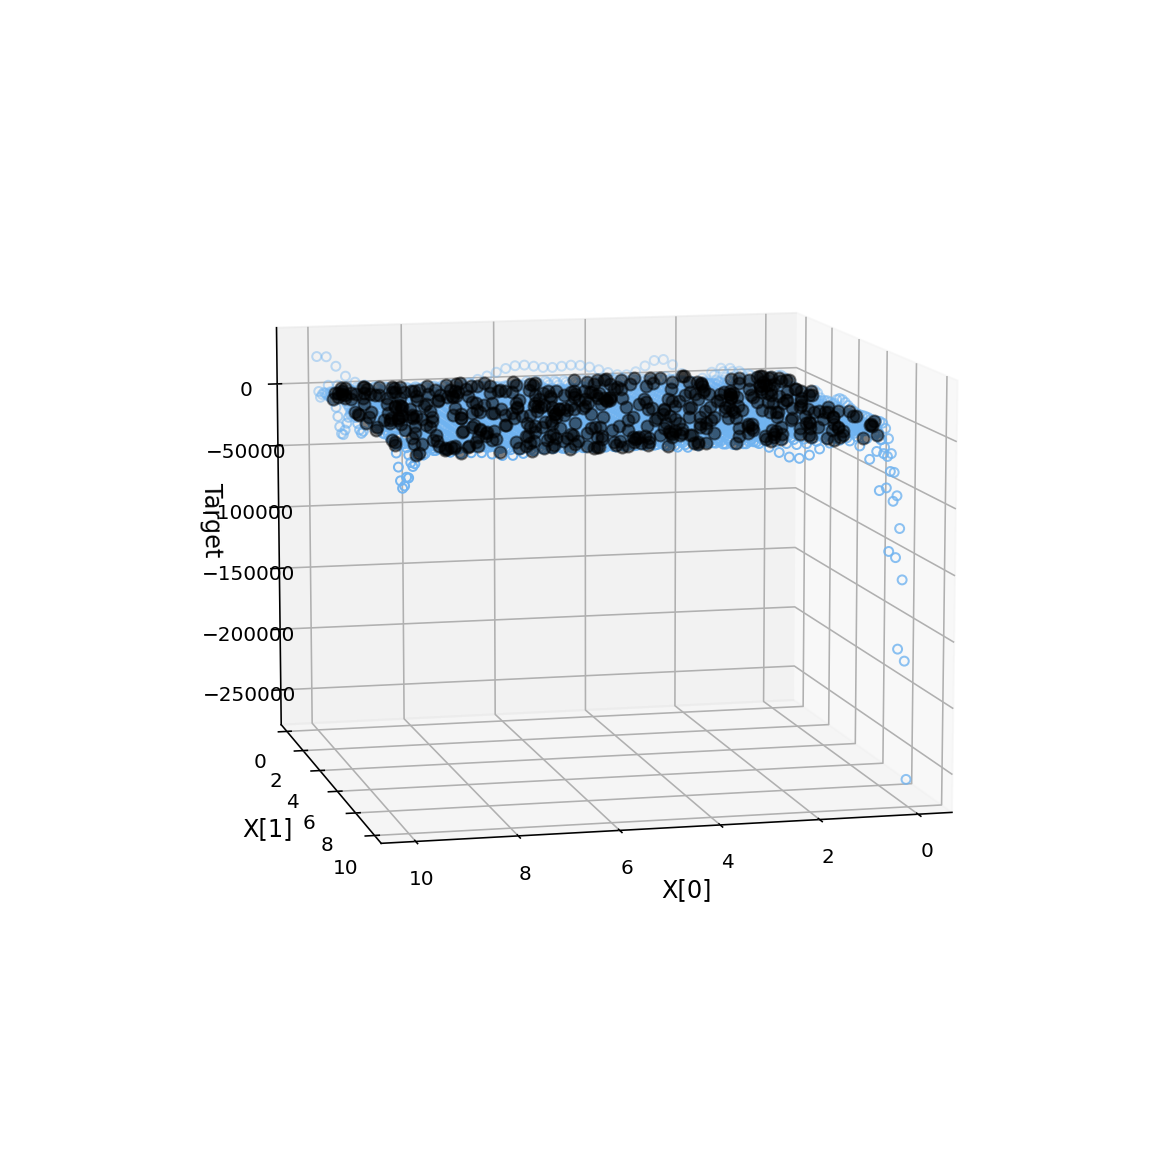

In [68]:
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(data[:,0],data[:,1], data[:,2], color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid3d[:,0].flatten(), Xgrid3d[:,1].flatten(),y_predgp, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

#fit WITHOUT uncertainties

In [ ]:
# To turn off interactive plotting
%matplotlib inline

In [72]:
#7
modelPR = PolynomialRegression(4) 
modelPR.fit(data[:,0:2],data[:,2],data[:,3])
y_predPR = modelPR.predict(Xgrid3d)
print(modelPR.coef_)

%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(data[:,0],data[:,1], data[:,2], color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid3d[:,0].flatten(), Xgrid3d[:,1].flatten(),y_predPR, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

#This is a lot smoother than the GPR and kernel methods, but not quite as flat as the linear methods

[ 4.99887582e+01  5.54313398e-01 -2.07866484e-01  2.86536907e-01
  2.93842379e-03 -7.82230112e-01  2.47603263e-02  2.45748271e-02
 -2.22233559e-02  9.68417971e-03 -9.95958746e-04 -1.12284370e-03
 -1.14462222e-03  2.10142159e-03 -1.08539159e-03]


<IPython.core.display.Javascript object>

In [73]:
# To turn off interactive plotting
%matplotlib inline

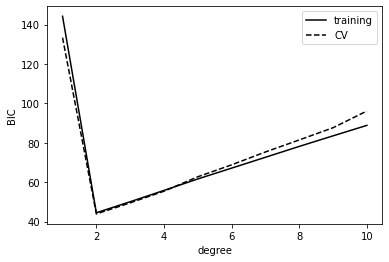

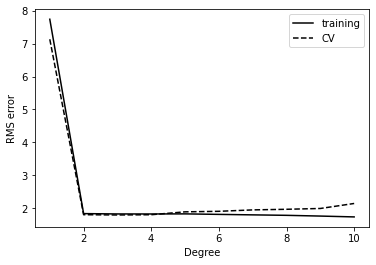

Best fit degree = 2
Training error = 2.246344685875526


In [85]:
#8
X_train,X_test,y_train,y_test,yerr_train,yerr_test = train_test_split(data[:,0:2],data[:,2],data[:,3],test_size=0.2)
X_traincv,X_cv,y_traincv,y_cv,yerr_traincv,yerr_cv = train_test_split(X_train,y_train,yerr_train,test_size=0.2)

d = np.arange(1, 11)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

for i in range(len(d)):
    modelPRs = PolynomialRegression(d[i]) 
    modelPRs.fit(X_traincv,y_traincv,yerr_traincv)
    y_predPRs = modelPRs.predict(X_traincv)
    y_predPRcv = modelPRs.predict(X_cv)
    training_err[i] = np.sqrt(np.sum((y_predPRs - y_traincv) ** 2)
                              / len(y_traincv))
    crossval_err[i] = np.sqrt(np.sum((y_predPRcv - y_cv) ** 2)
                              / len(y_cv))

BIC_train = np.sqrt(len(y_traincv)) * training_err / 1 + d * np.log(len(y_traincv))
BIC_crossval = np.sqrt(len(y_traincv)) * crossval_err / 1 + d * np.log(len(y_traincv))

plt.plot(d,BIC_train,'-k',label='training')
plt.plot(d,BIC_crossval,'--k',label='CV')
plt.xlabel('degree')
plt.ylabel('BIC')
plt.legend()
plt.show()

plt.plot(d,training_err,'-k',label='training')
plt.plot(d,crossval_err,'--k',label='CV')
plt.xlabel('Degree')
plt.ylabel('RMS error')
plt.legend()
plt.show()

print('Best fit degree = '+str(2))

modelPRfinal = PolynomialRegression(2) 
modelPRfinal.fit(X_train,y_train,yerr_train)
y_predPRfinal = modelPRfinal.predict(X_test)
training_err_final = np.sqrt(np.sum((y_predPRfinal - y_test) ** 2)/ len(y_test))
print('Training error = '+str(training_err_final))